In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
# STEP 2: Load Data
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\TopMentor\Logistic_Regression\bank-full.csv", sep=';')
print(" Data Loaded Successfully!")
print("Shape of Dataset:", df.shape)
df.head()

 Data Loaded Successfully!
Shape of Dataset: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# STEP 3: Preprocessing Setup
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Binary encoding

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [9]:
# STEP 3: Preprocessing Setup
X = df.drop('y', axis=1)
y = df['y'].map({'yes': 1, 'no': 0})  # Binary encoding

cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])


In [10]:
# STEP 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (36168, 16)
Test set size: (9043, 16)


In [11]:
# STEP 5: Build and Train Model
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
print("✅ Model Trained Successfully!")

✅ Model Trained Successfully!


In [12]:
# STEP 6: Evaluation - Classification Report
y_pred = pipeline.predict(X_test)

report = classification_report(y_test, y_pred, digits=3)
print("📋 Classification Report:\n", report)

📋 Classification Report:
               precision    recall  f1-score   support

           0      0.924     0.972     0.947      7985
           1      0.651     0.396     0.492      1058

    accuracy                          0.904      9043
   macro avg      0.787     0.684     0.720      9043
weighted avg      0.892     0.904     0.894      9043



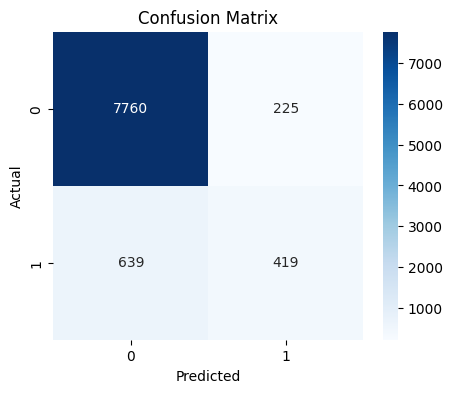

In [13]:
# STEP 7: Evaluation - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


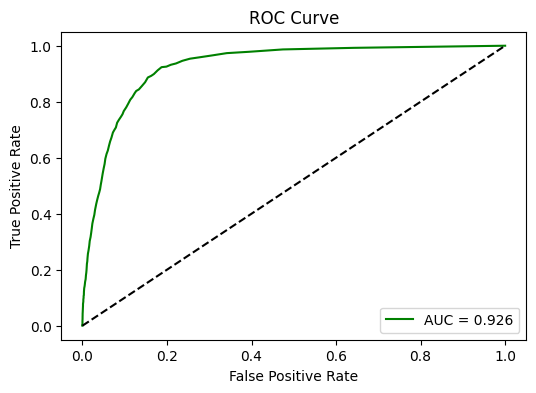

In [14]:
# STEP 8: Evaluation - ROC Curve
y_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_score:.3f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [15]:
# STEP 9: Inference on a Random Sample
sample = X_test.sample(1, random_state=42)
prediction = pipeline.predict(sample)[0]
print("🔍 Inference Result for Random Sample:", "Subscribed" if prediction == 1 else "Not Subscribed")


🔍 Inference Result for Random Sample: Not Subscribed
